<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Qiskit Exploration: Quantum and Classical Registers
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2022
University of Illinois Board of Trustees. All Rights Reserved.

# imports

In [1]:
import qiskit
import numpy
import pandas

## conveniences

In [2]:
def find_backend(verbose=False):
    backends={}
    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().qubits)
        except:
            qubit_count = numpy.inf

        if qubit_count>=2:
            backends[backend.name()]=backend.status().pending_jobs
            if verbose:
                print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
    backends_series=pandas.Series(backends)
    return backends_series.idxmin()

DEFAULT_BACKEND="ibmq_qasm_simulator"

# main

Quantum registers are converted into classical registers when observed.  We may have unobserved quantum registers.  We may also (although it may not be useful) to have classical registers which are not connected to quantum registers

In [3]:
tokenfile="./token.txt"
qiskit.IBMQ.save_account(open(tokenfile, "r").read())
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider("ibm-q")

configrc.store_credentials:WARNING:2022-05-21 11:46:48,278: Credentials already present. Set overwrite=True to overwrite.


## 2 quantum and 2 classical registers

In [4]:
circuit = qiskit.QuantumCircuit(2,2)
circuit.x(0)
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐┌─┐
q_0: ┤ X ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 2/══╩═══╩═
       1   0

In [5]:
find_backend(verbose=True)

ibmq_qasm_simulator has 2 queued and inf qubits
ibmq_santiago has 94 queued and 5 qubits
ibmq_bogota has 104 queued and 5 qubits
ibmq_lima has 30 queued and 5 qubits
ibmq_belem has 0 queued and 5 qubits
ibmq_quito has 96 queued and 5 qubits
simulator_statevector has 1 queued and inf qubits
simulator_mps has 1 queued and inf qubits
simulator_extended_stabilizer has 1 queued and inf qubits
simulator_stabilizer has 1 queued and inf qubits
ibmq_manila has 146 queued and 5 qubits


'ibmq_belem'

In [6]:
#bestbackend=find_backend()
#print("\nbest backend seems to be {0:s}".format(bestbackend))
backend = provider.get_backend(DEFAULT_BACKEND)
job = qiskit.execute(circuit, backend = backend, shots = 100)
qiskit.tools.monitor.job_monitor(job)

Job Status: job has successfully run


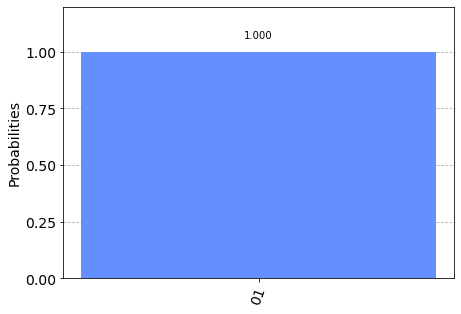

In [7]:
result = job.result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram([counts])

## 3 quantum and 2 classical registers

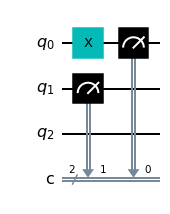

In [8]:
circuit = qiskit.QuantumCircuit(3, 2)
circuit.x(0)
circuit.measure([0, 1], [0, 1])
circuit.draw(output="mpl",filename="3and2.jpg")

In [9]:
#bestbackend=find_backend()
#print("\nbest backend seems to be {0:s}".format(bestbackend))
backend = provider.get_backend(DEFAULT_BACKEND)
job = qiskit.execute(circuit, backend = backend, shots = 100)
qiskit.tools.monitor.job_monitor(job)

Job Status: job has successfully run


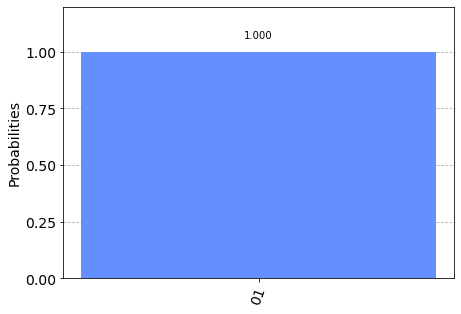

In [10]:
result = job.result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram([counts])

## 2 quantum and 3 classical registers

In [11]:
circuit = qiskit.QuantumCircuit(2, 3)
circuit.x(0)
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐┌─┐
q_0: ┤ X ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 3/══╩═══╩═
       1   0

In [12]:
#bestbackend=find_backend()
#print("\nbest backend seems to be {0:s}".format(bestbackend))
backend = provider.get_backend(DEFAULT_BACKEND)
job = qiskit.execute(circuit, backend = backend, shots = 100)
qiskit.tools.monitor.job_monitor(job)

Job Status: job has successfully run


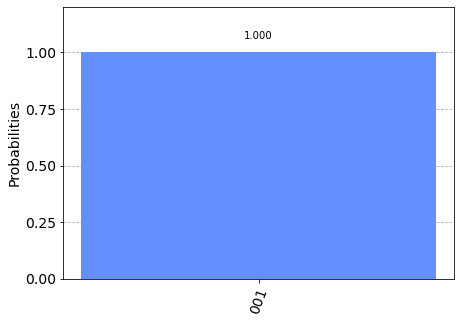

In [13]:
result = job.result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram([counts])